# Analisis de Datos del Grupo D
## **Universidad Tecnológica Nacional(UTN) y Universidad Nacional de Tres de Febrero(UNTF)**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importates del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [107]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

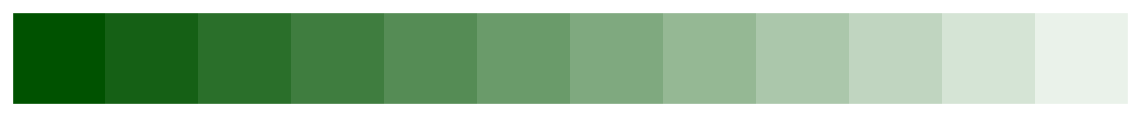

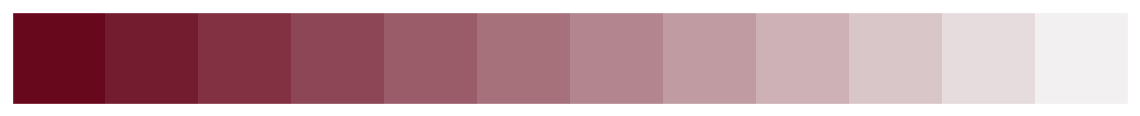

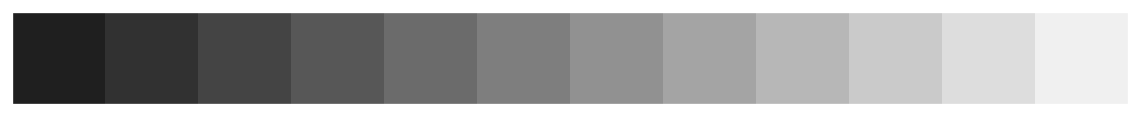

In [108]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [109]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoD_tecnologica_universidad'
university1_name = 'Universidad Tecnológica Nacional'

university2 = 'GrupoD_tres_de_febrero_universidad'
university2_name = ' Universidad Nacional de Tres de Febrero'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [110]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [111]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852 entries, 0 to 1851
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1852 non-null   object
 1   career            1852 non-null   object
 2   inscription_date  1852 non-null   object
 3   first_name        1852 non-null   object
 4   last_name         1852 non-null   object
 5   gender            1852 non-null   object
 6   age               1852 non-null   int64 
 7   postal_code       1852 non-null   int64 
 8   location          1852 non-null   object
 9   email             1852 non-null   object
dtypes: int64(2), object(8)
memory usage: 144.8+ KB


In [112]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4359 entries, 0 to 4358
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        4359 non-null   object
 1   career            4359 non-null   object
 2   inscription_date  4359 non-null   object
 3   first_name        4321 non-null   object
 4   last_name         4359 non-null   object
 5   gender            4359 non-null   object
 6   age               4359 non-null   int64 
 7   postal_code       4359 non-null   int64 
 8   location          4359 non-null   object
 9   email             4359 non-null   object
dtypes: int64(2), object(8)
memory usage: 340.7+ KB


In [113]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad Tecnológica Nacional es de: 33
La cantida de carreras en la  Universidad Nacional de Tres de Febrero es de: 33


In [114]:
df_1.describe()

,age,postal_code
count,1852.000000,1852.000000
mean,58.692765,4607.671706
std,33.319923,2185.593560
min,1.000000,1602.000000
25%,30.000000,2820.000000
50%,60.000000,4128.000000
75%,87.000000,6331.500000
max,116.000000,9421.000000


In [115]:
df_2.describe()

,age,postal_code
count,4359.000000,4359.000000
mean,24.381051,4783.253040
std,7.366310,2220.470329
min,19.000000,1601.000000
25%,21.000000,2944.000000
50%,21.000000,4601.000000
75%,21.000000,6505.000000
max,50.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

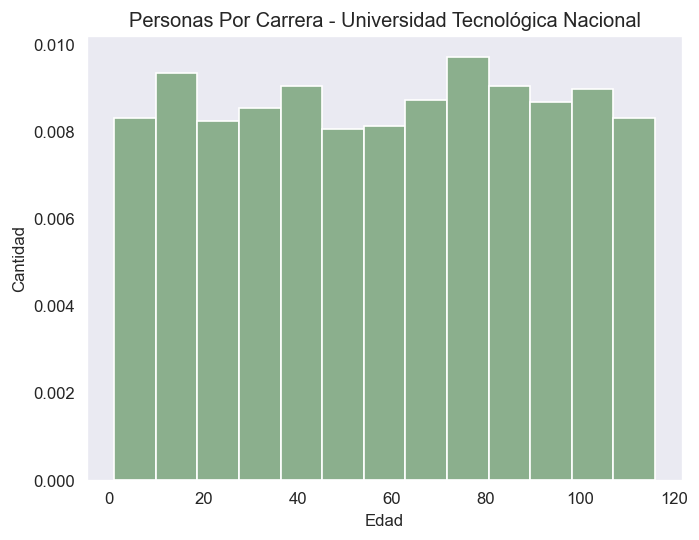

In [116]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

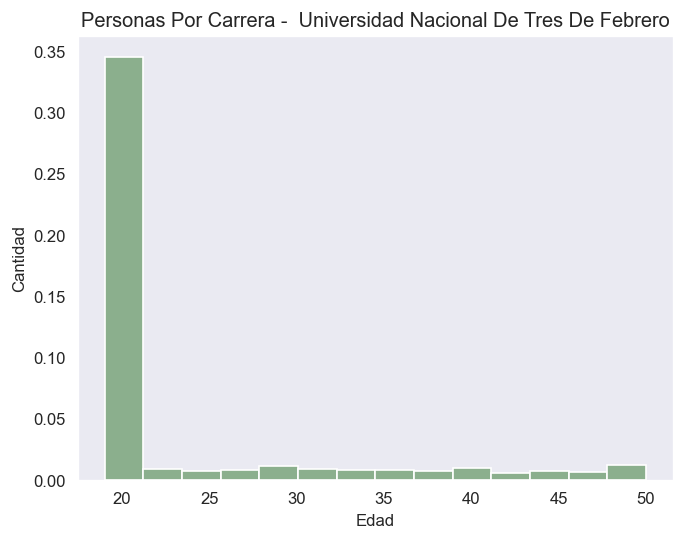

In [117]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1). Esta

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [118]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Carrera')

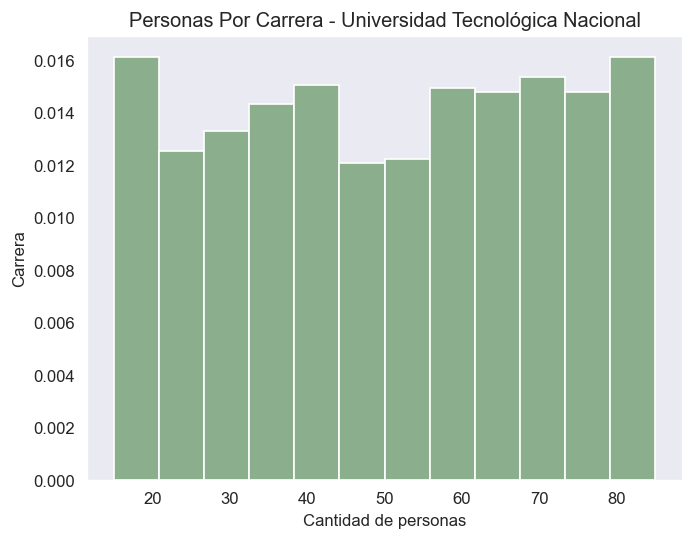

In [119]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

La distribución de las dedades para esta universidad parece tratarse de una distribución uniforme.

Text(0, 0.5, 'Cantidad')

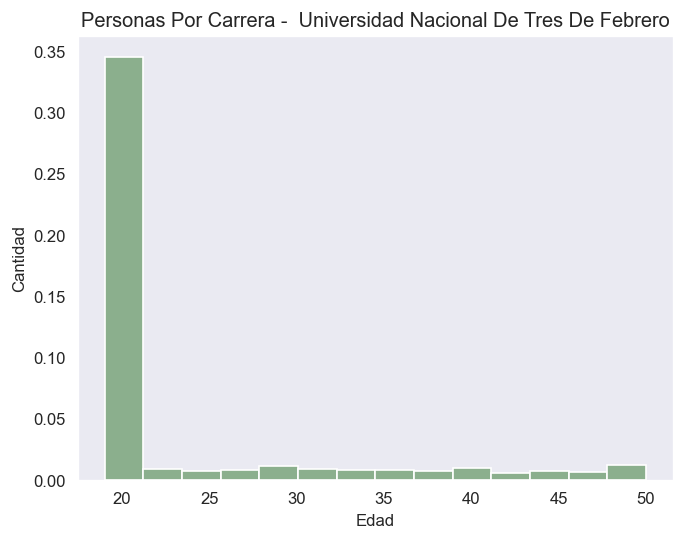

In [120]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [121]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [122]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [123]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [124]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [125]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,1748,EL GRANADERO,Buenos Aires,B,-34.6181,-58.9564,3.0,universidad tecnológica nacional,licenciatura en ciencias geológicas,2020-09-28,jeffrey,nash,male,84,general rodriguez,bmorgan@hotmail.com
1,AR,1748,LA FRATERNIDAD,Buenos Aires,B,-34.6181,-58.9564,3.0,universidad tecnológica nacional,licenciatura en ciencias geológicas,2020-09-28,jeffrey,nash,male,84,general rodriguez,bmorgan@hotmail.com


In [126]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,6628,CORONEL SEGUI,Buenos Aires,B,-34.8667,-60.3833,4.0,universidad nacional de tres de febrero,ingeniería electrónica,2021-01-05,lisa,lopez,female,19,colonia zambungo,fsmith@yahoo.com
1,AR,6628,LA DORMILONA,Buenos Aires,B,-34.8125,-60.2375,3.0,universidad nacional de tres de febrero,ingeniería electrónica,2021-01-05,lisa,lopez,female,19,colonia zambungo,fsmith@yahoo.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

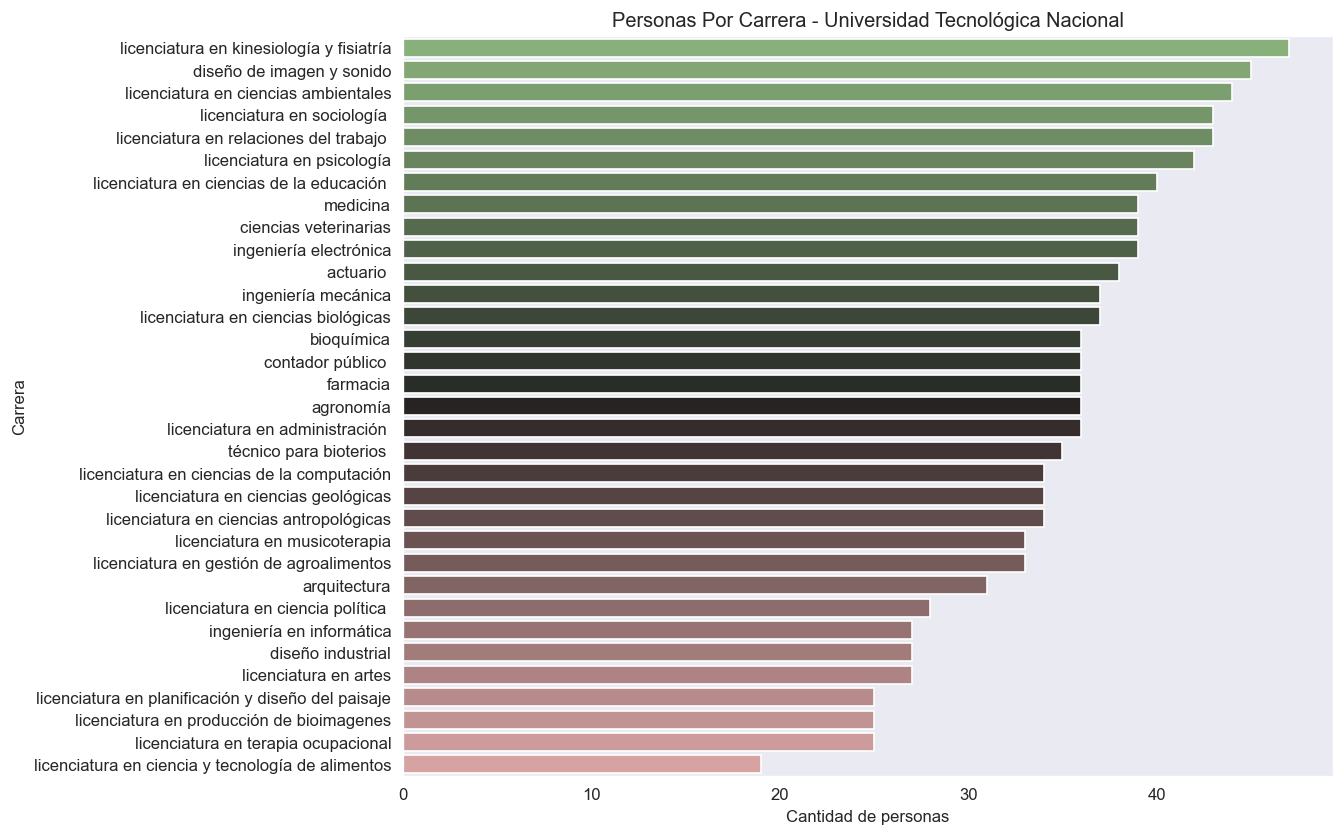

In [127]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera.

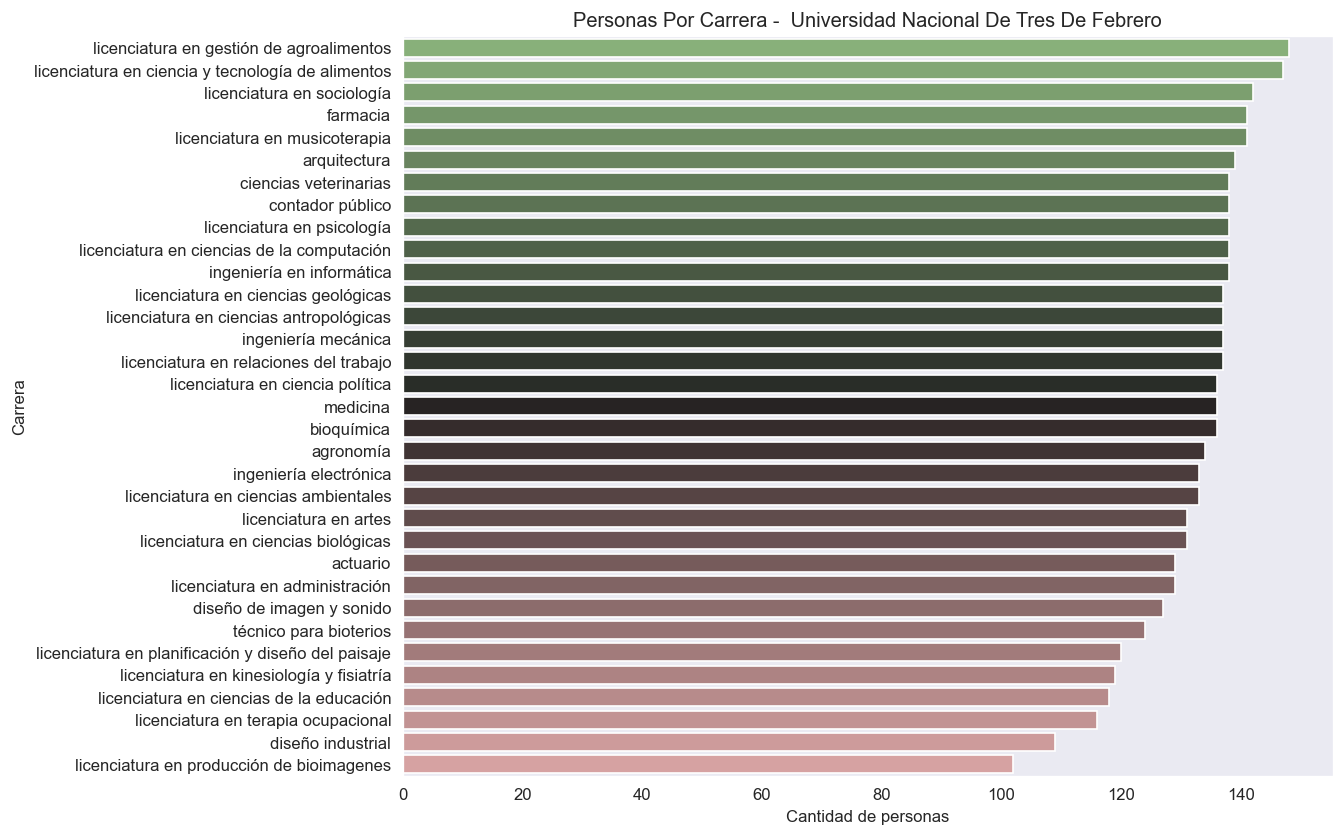

In [128]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es más grande y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad Tecnológica Nacional

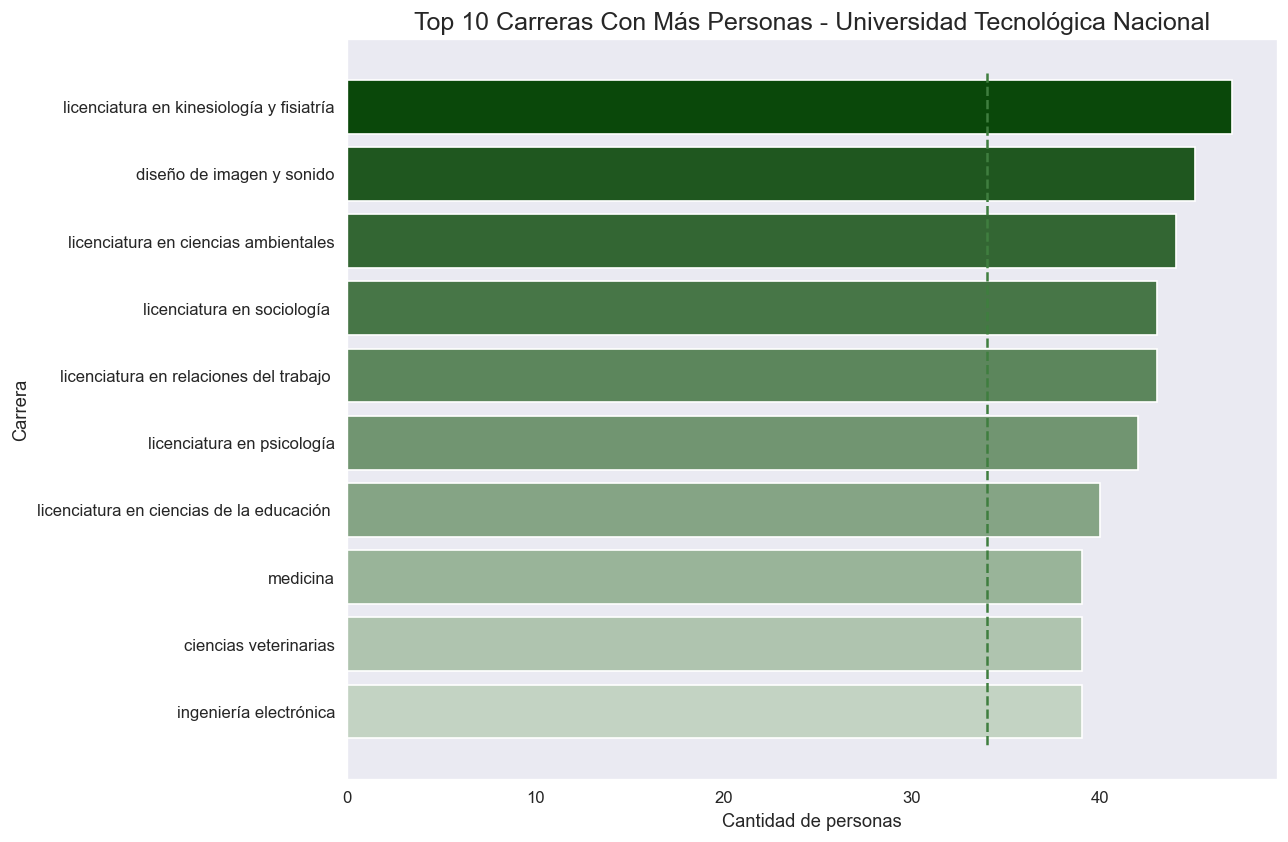

In [129]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

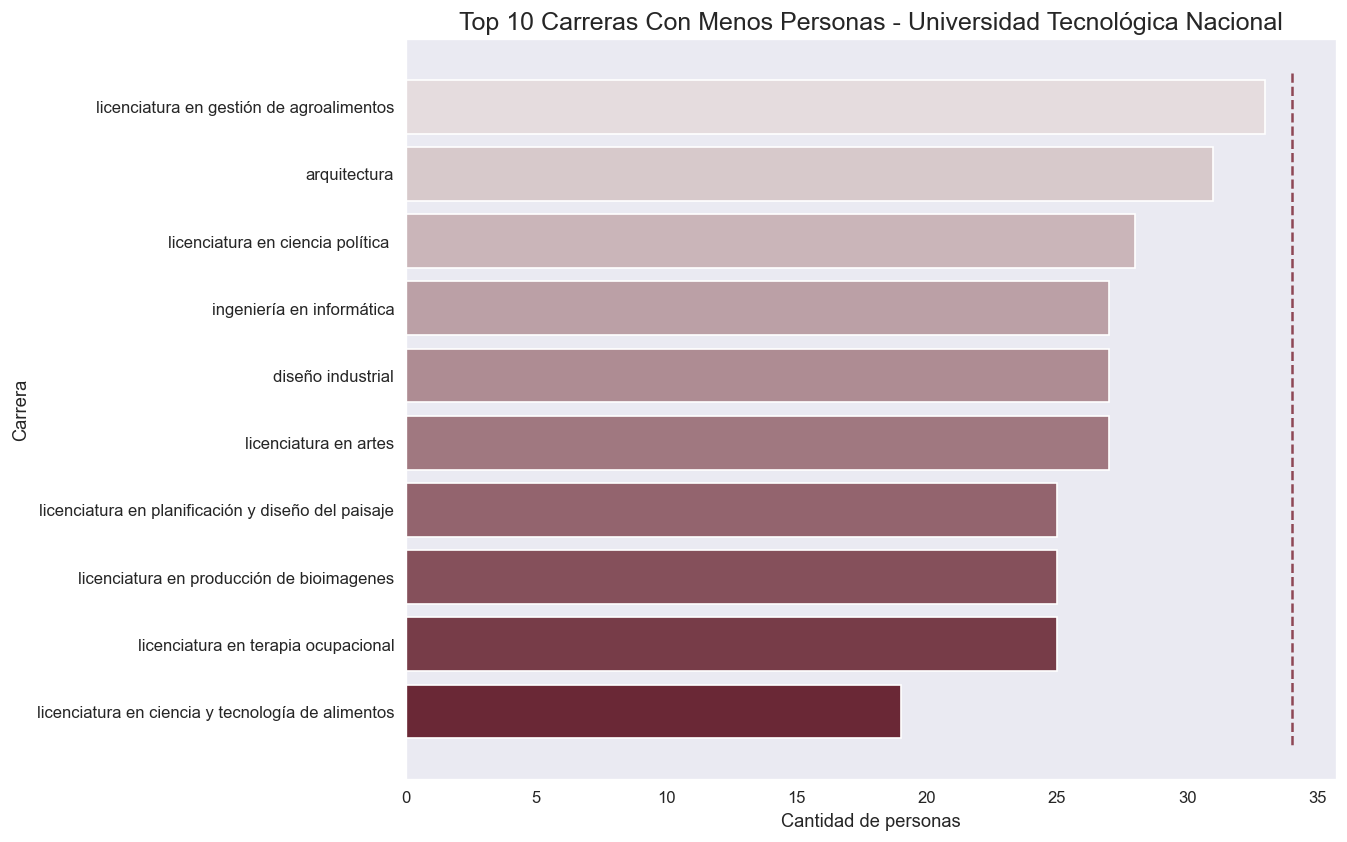

In [130]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, estás 10 carreras son las que menor cantidad de alumnos presenta y que se encuentran alejados de la media de todas las carreras, vista como una línea punteada en el gráfico.

Text(0, 0.5, 'Cantidad de carreras')

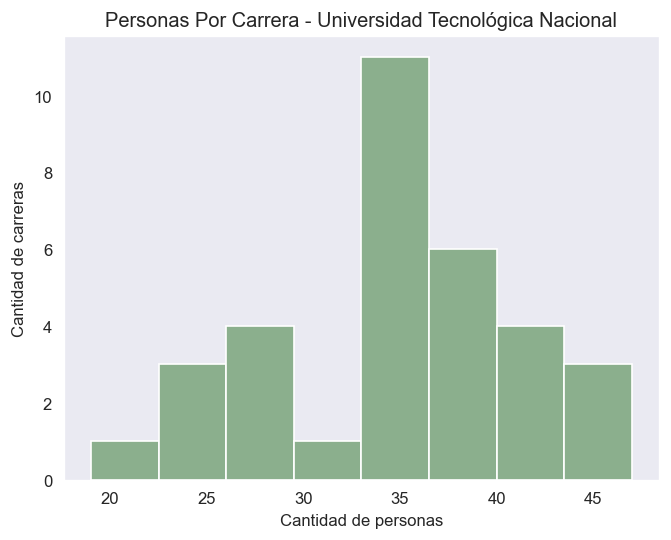

In [131]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [132]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     34.848485
std       6.662025
min      19.000000
25%      31.000000
50%      36.000000
75%      39.000000
max      47.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 34 alumnos y parece estar sesgada hacía la derecha, en este caso la mayoría de las carreras tienen al menos 31 alumnos.

### Universidad Nacional de Tres de Febrero

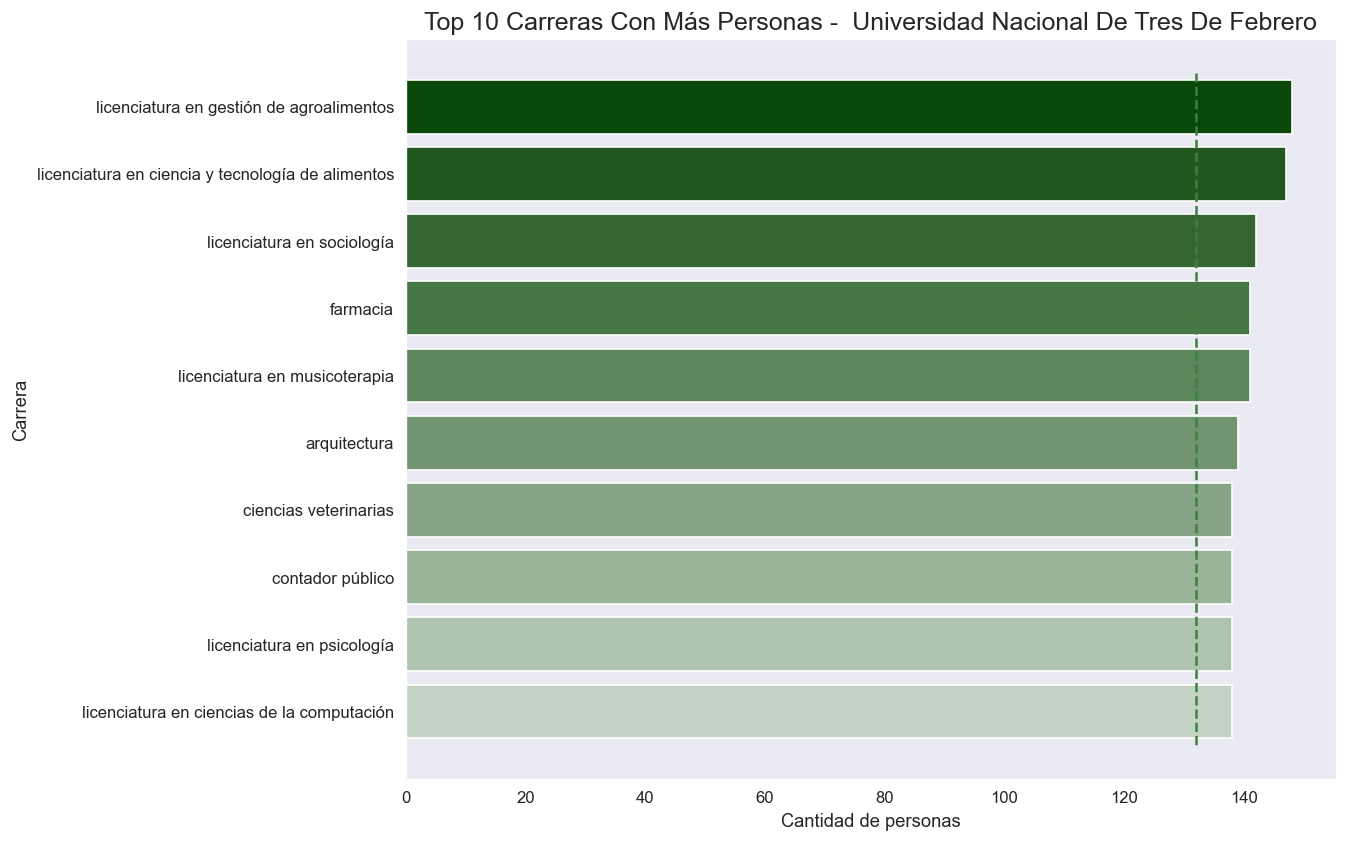

In [133]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

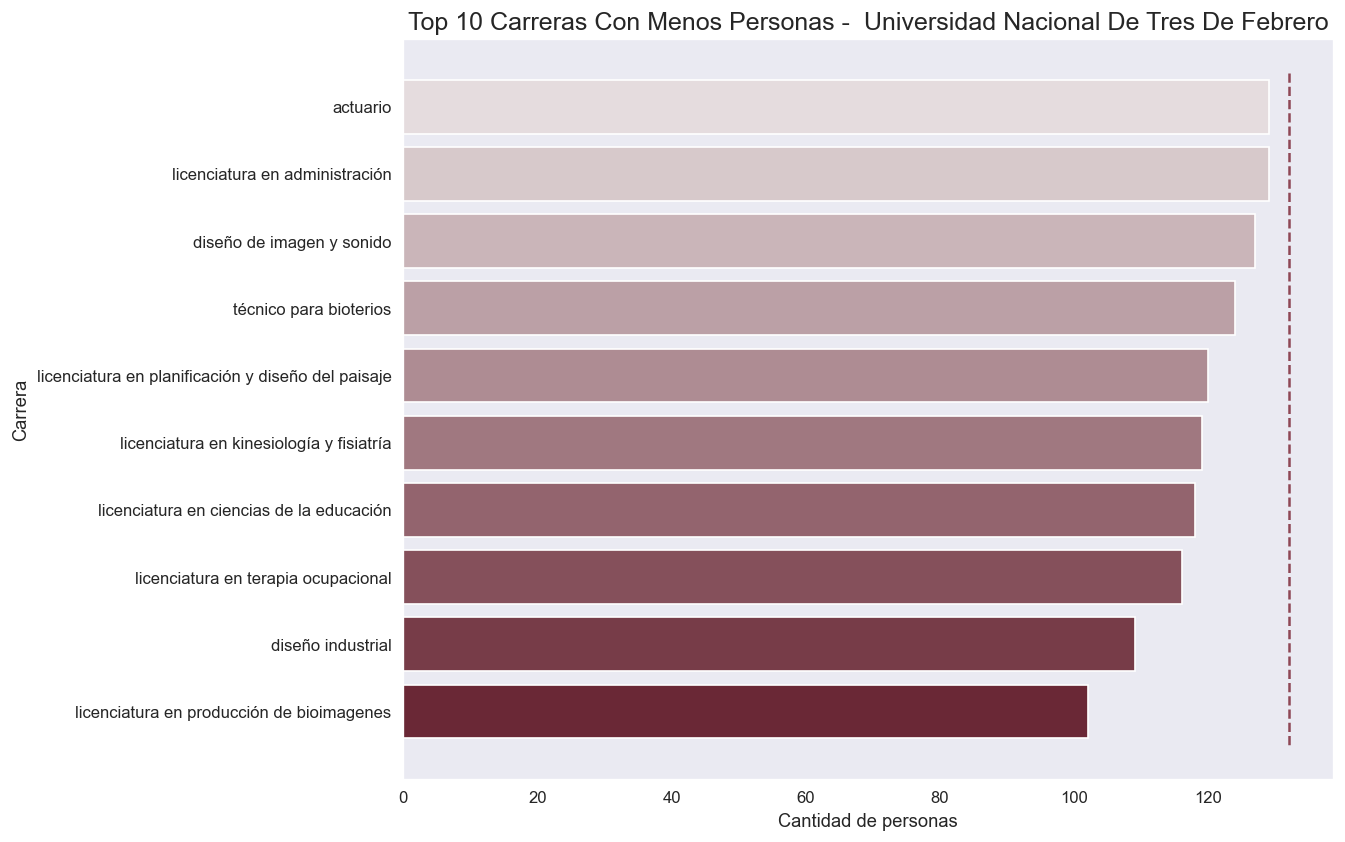

In [134]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Text(0, 0.5, 'Cantidad de carreras')

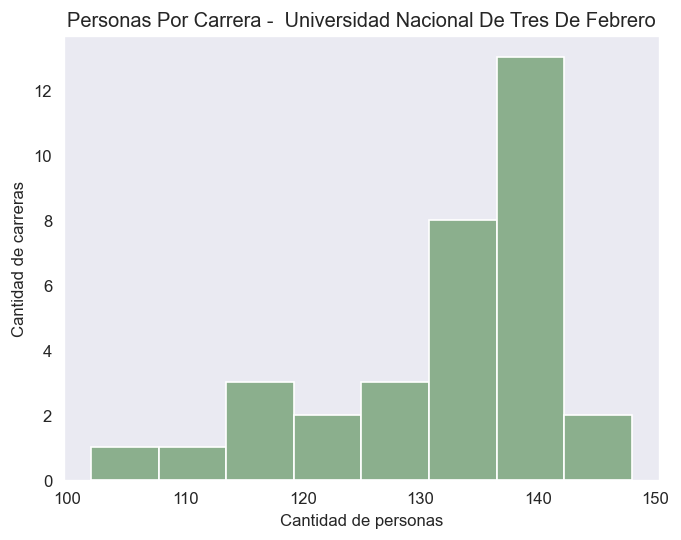

In [135]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [136]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count     33.000000
mean     132.090909
std       10.351219
min      102.000000
25%      129.000000
50%      136.000000
75%      138.000000
max      148.000000
Name: career, dtype: float64

En este caso la media es de 129 alumnos por carrera, presentando un minímo de 106, pero la mayoría de las carreras tienen al menos 120 alumnos en esta universidad. Parece tratarse de una distribución normal de las edades.

### Análisis por género y edad - UTN

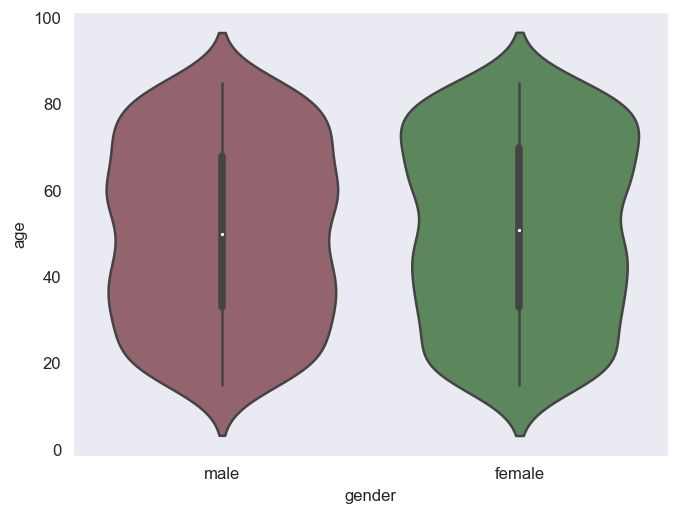

In [137]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, aunque si podemos observar una una bimodalidad en el gráfico de varones ubicado aproximadamente en los 30 años y los 70 años.

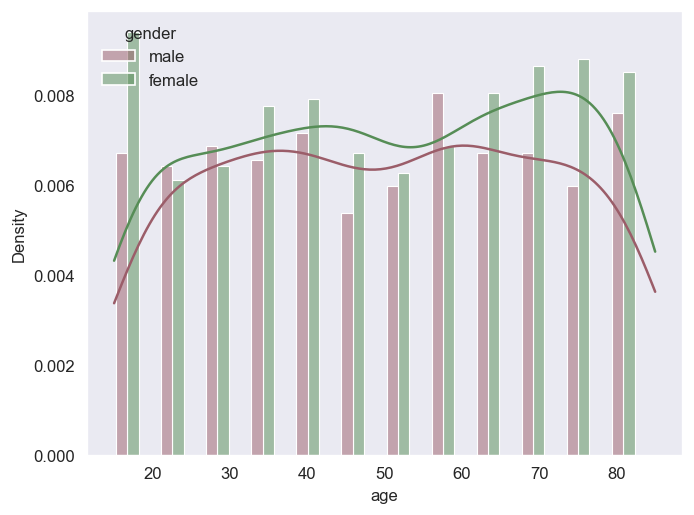

In [138]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver un pico de alumnos de avanzada edad, asi como de alumnos menores a 20 años en los varones, en las mujeres es uniforme con una caída en torno a los 45 años.

### Provincias - UTN

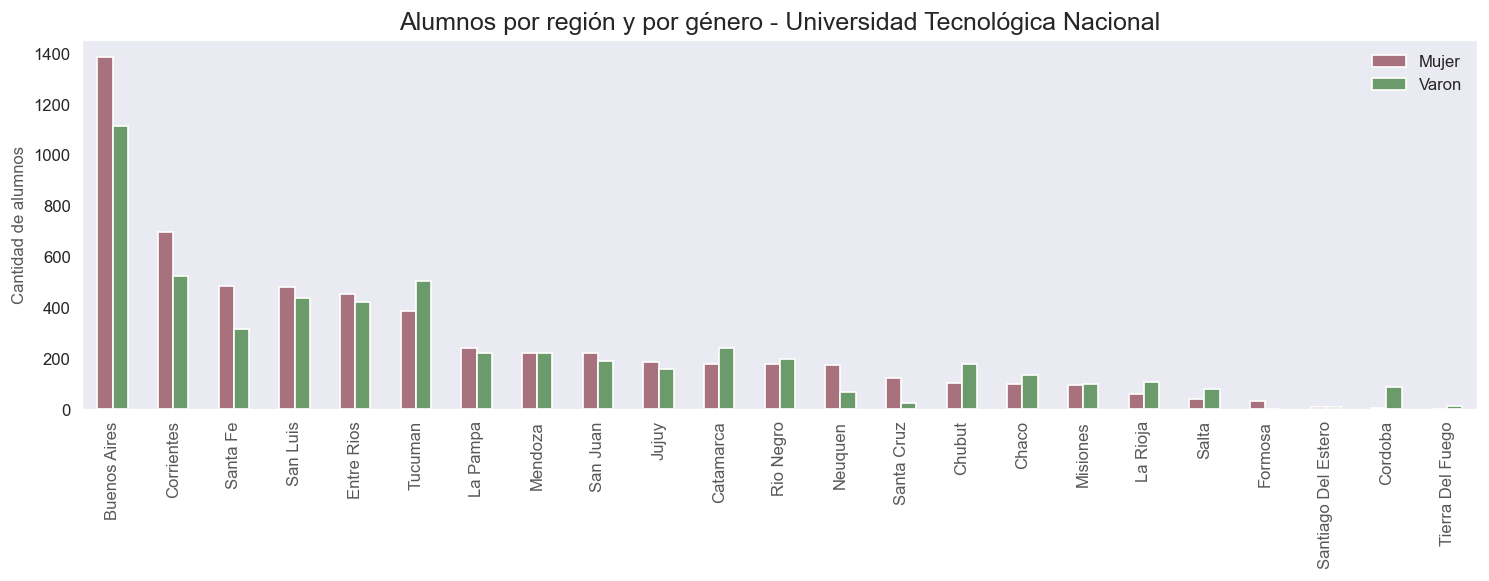

In [139]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros

Text(0.5, 0, '')

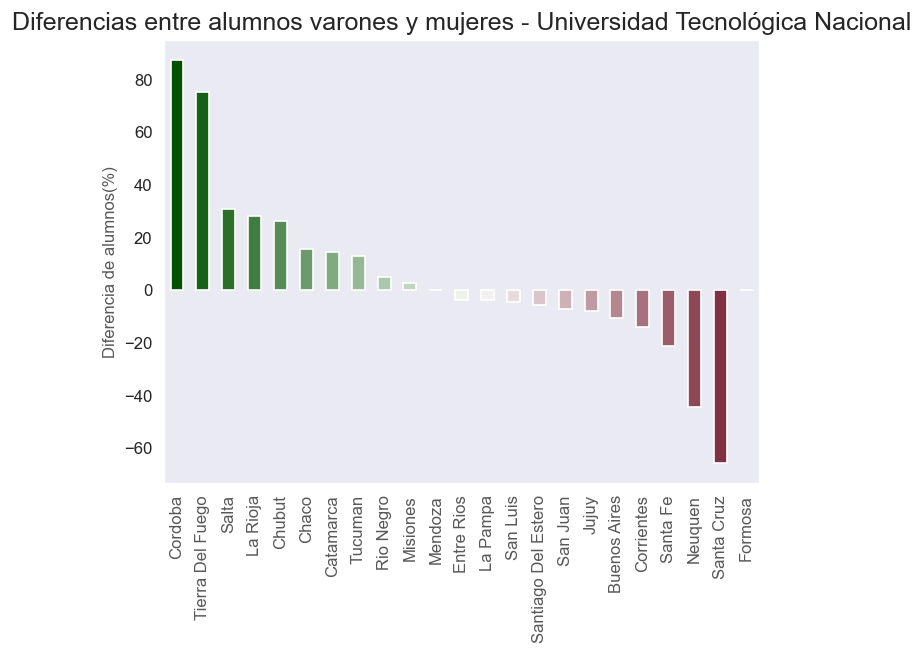

In [140]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Cordoba es la que presenta mayor disparidad respecto a varones junto con Tierra del Fuego y Formosa. Respecto a disparidad de mujeres Salta, Chaco y Neuquén son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - UTN

In [141]:
df_1.location.value_counts().head(10)

abra                             5
estacion saguier                 5
algarrobo                        5
bella vista                      5
kilometro 125                    4
aguas calientes                  4
alto del saladillo               4
san isidro                       4
aguada de la peña                4
alto nuestra señora del valle    4
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

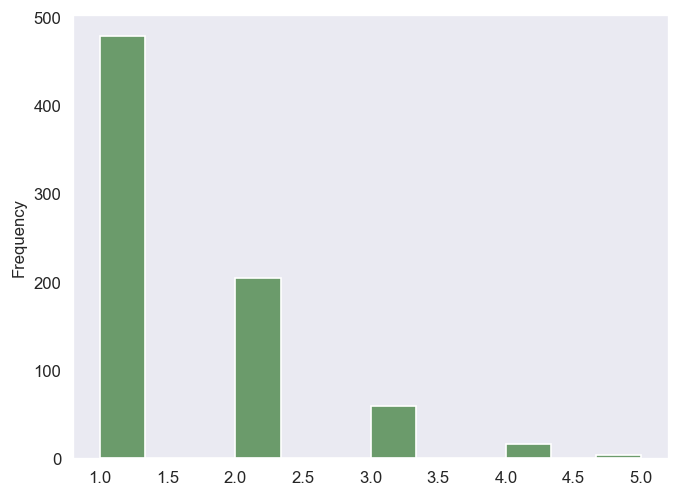

In [142]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

Al parecer **no hay una localidad que destaque** por su aporte de alumnos siendo que la mayoría aporta solo un alumno o dos.

### Análisis por género y edad - UNTF

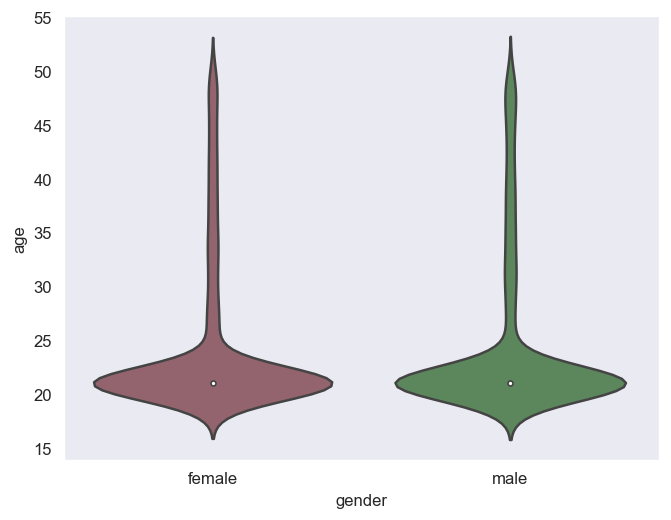

In [143]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

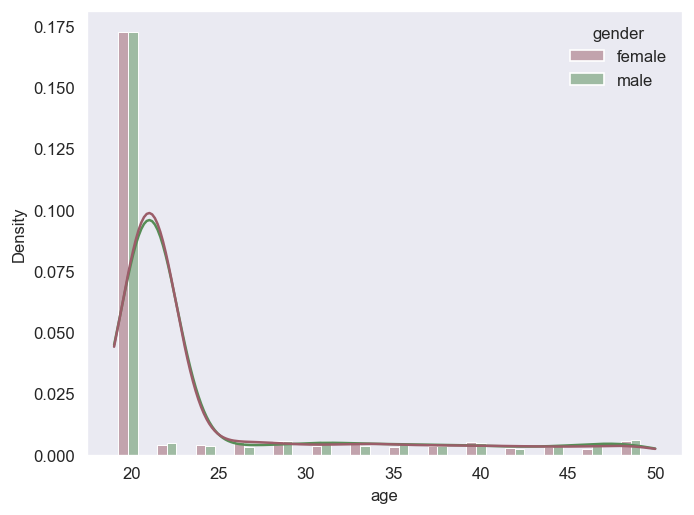

In [144]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece tener un gran pico en 20 años y una proporción muy baja y dispersa de las demás edades.

### Provincias - UNTF

C:\Users\julia\AppData\Local\Temp\ipykernel_10284\3775228803.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


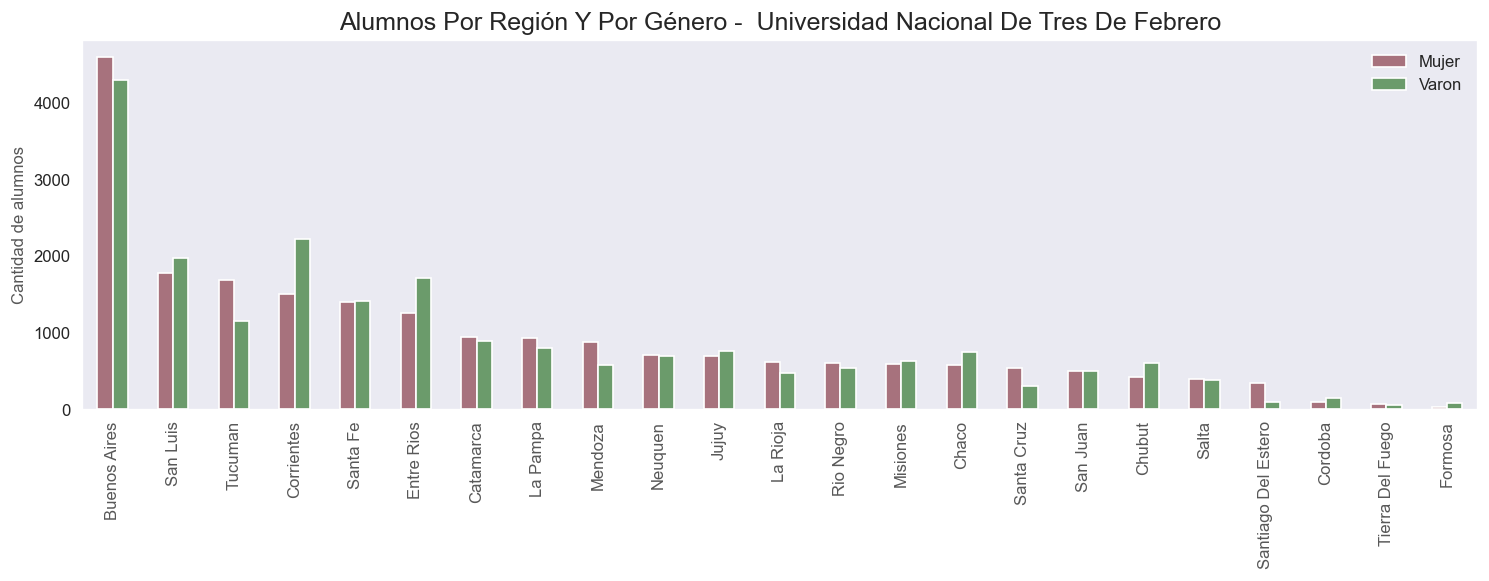

In [145]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

La mayoría de los alumnos provinen de la provincia de Buenos Aires, seguida por San Luis, Tucuman con cierta disparidad en alumnas femeninas frente a varones y Corrientes con la tendencia inversa.

Text(0.5, 0, '')

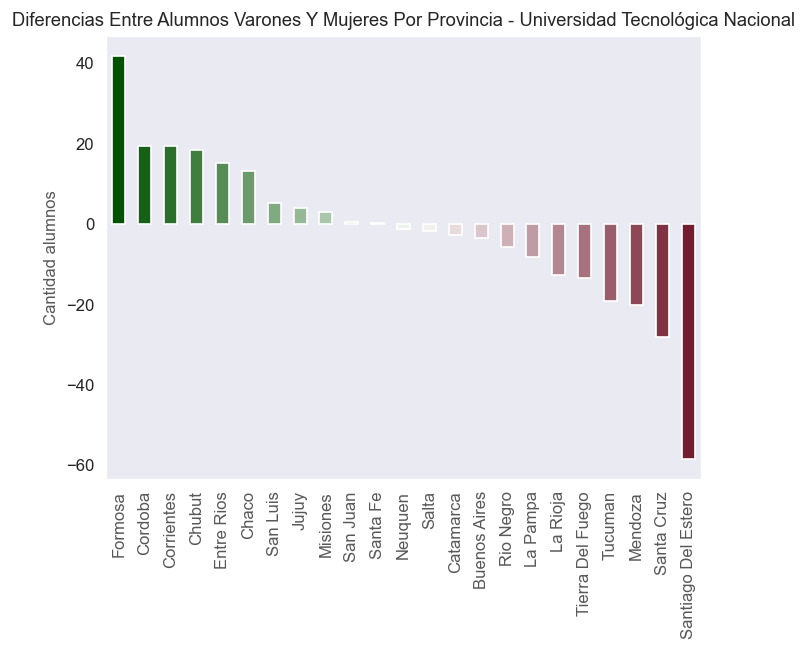

In [146]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university1_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

De forma proporcional la provincia de Formosa parece aportar alumnos con cierta disparidad de varones frente a mujeres, con un porcentaje de 40%. Por otro lado Santiago del Estero aporta alumnos con una disparidad mayor al 50% en alumnado femenino.

### Localidades - UNTF

In [147]:
df_2.location.value_counts().head(10)

25 de mayo       18
algarrobo        18
9 de julio       15
bella vista      14
castelar         11
agua colorada    11
aconquija        10
la tranca        10
arroyo seco      10
alegria          10
Name: location, dtype: int64

<AxesSubplot:ylabel='Frequency'>

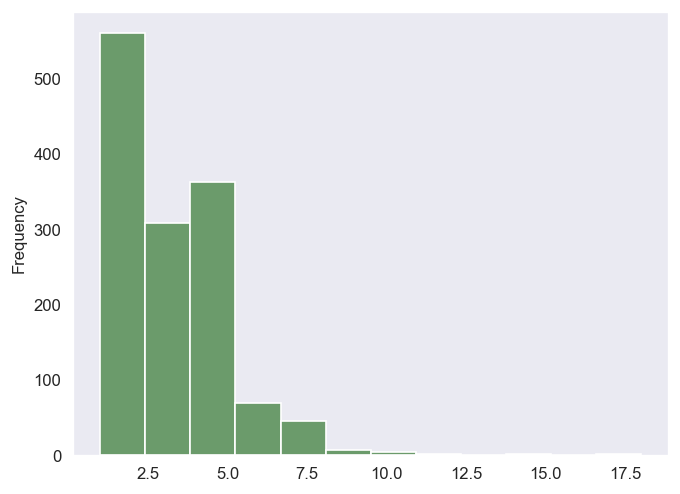

In [148]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])

### Segregación por tipo de carrera

In [149]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

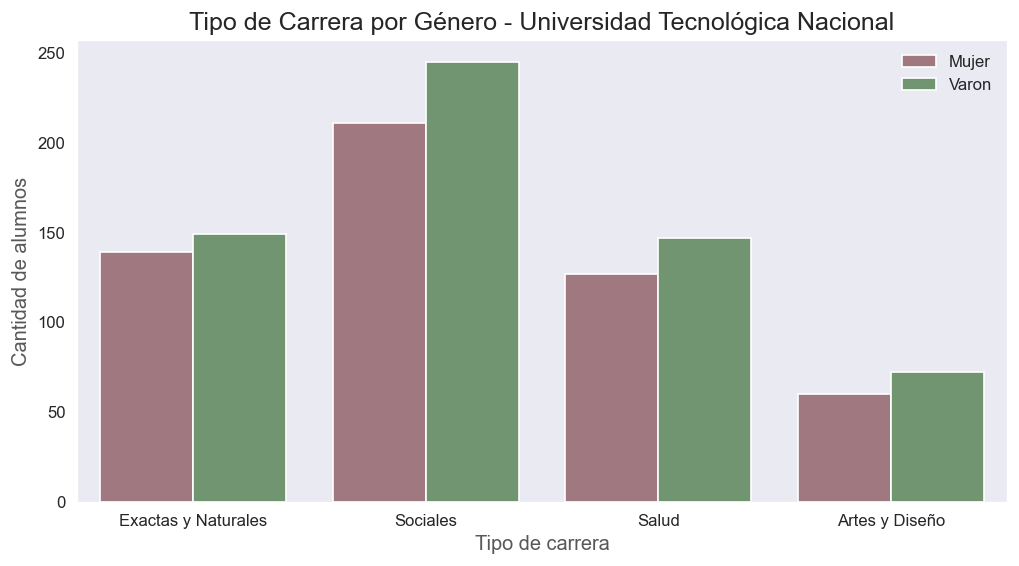

In [150]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


**En la UTN parece haber cierta disparidad de varones frente a mujeres en todos los tipos de carreras.**

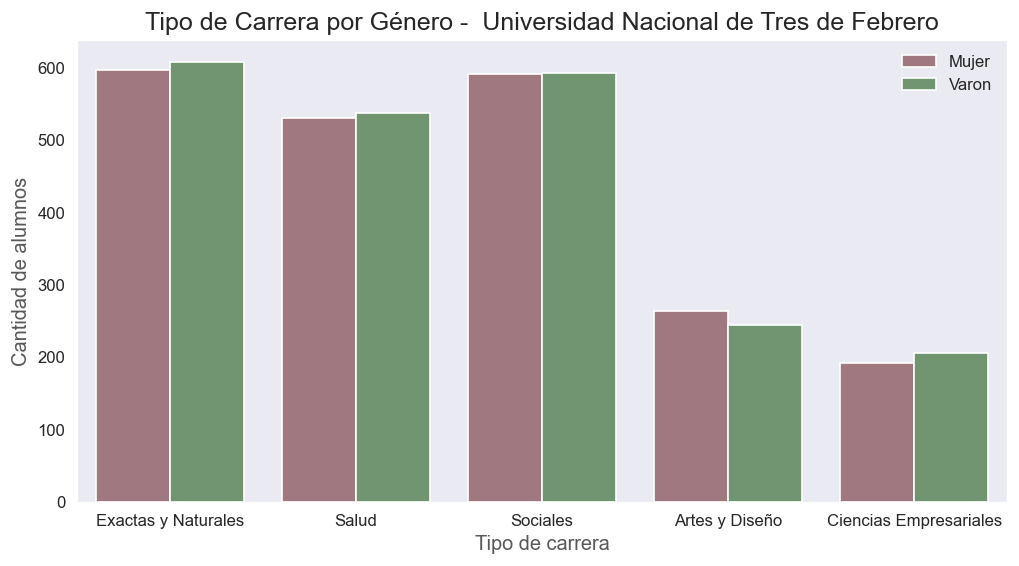

In [151]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

Por último si diferenciamos por tipo de carrera podemos ver que la mayor disparidad de varones se da en Ciencias Empresariales y Exactas y Naturales en la UNTF. Por otro lado en ciencias empresariales se ve mayor proporción de alumnas. Sociales parece tener cierta equidad respecto al género.

### Top Carreras por Proporción de Alumnas - UTN

In [152]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
licenciatura en ciencias biológicas,0.675676,0.324324
licenciatura en gestión de agroalimentos,0.666667,0.333333
diseño de imagen y sonido,0.666667,0.333333
licenciatura en administración,0.666667,0.333333
licenciatura en kinesiología y fisiatría,0.595745,0.404255


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas a la salud y la disparidad es mayor al 15% en algunos casos.**

In [153]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
medicina,0.461538,0.538462
licenciatura en musicoterapia,0.454545,0.545455
licenciatura en sociología,0.418605,0.581395
ingeniería mecánica,0.405405,0.594595
ciencias veterinarias,0.384615,0.615385


No parece haber un patrón en las carreras menos concurridas. Cabe destacar que Ciencias Veterinarias suelen tener actidades de campo y que medicina posee gran cantidad de prácticas.

### Top Carreras por Proporción de Alumnas - UNTF

In [154]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
licenciatura en producción de bioimagenes,0.588235,0.411765
licenciatura en artes,0.557252,0.442748
diseño industrial,0.550459,0.449541
licenciatura en ciencias biológicas,0.549618,0.450382
agronomía,0.544776,0.455224


La disparidad de mujeres frente a hombres es menor al 10% y no parece haber una relación entre los tipos de carrera y la cantidad de mujeres.

In [155]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en ciencias de la educación,0.457627,0.542373
licenciatura en administración,0.457364,0.542636
licenciatura en ciencias geológicas,0.452555,0.547445
ingeniería electrónica,0.451128,0.548872
licenciatura en musicoterapia,0.446809,0.553191


La disparidad de varones frente a mujeres es menor al 6% y no parece haber relación entre el tipo de carrera y la disparidad.

### Algunos ejemplos

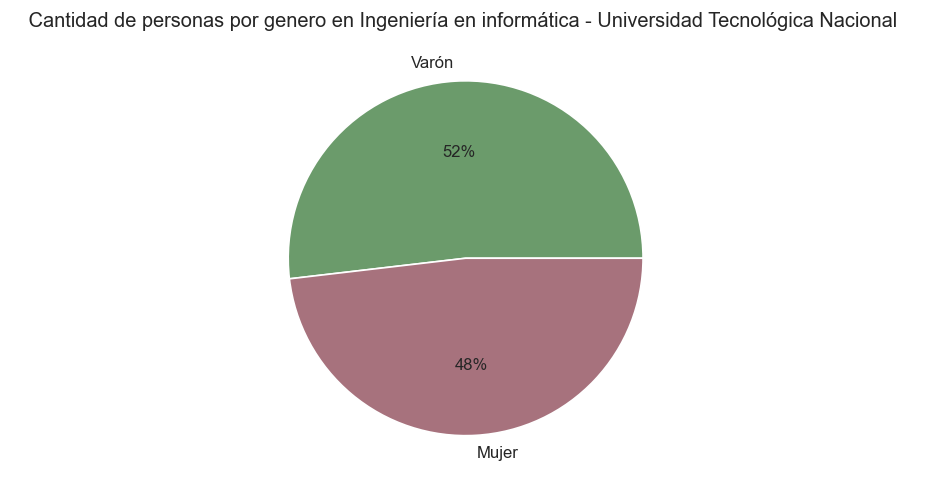

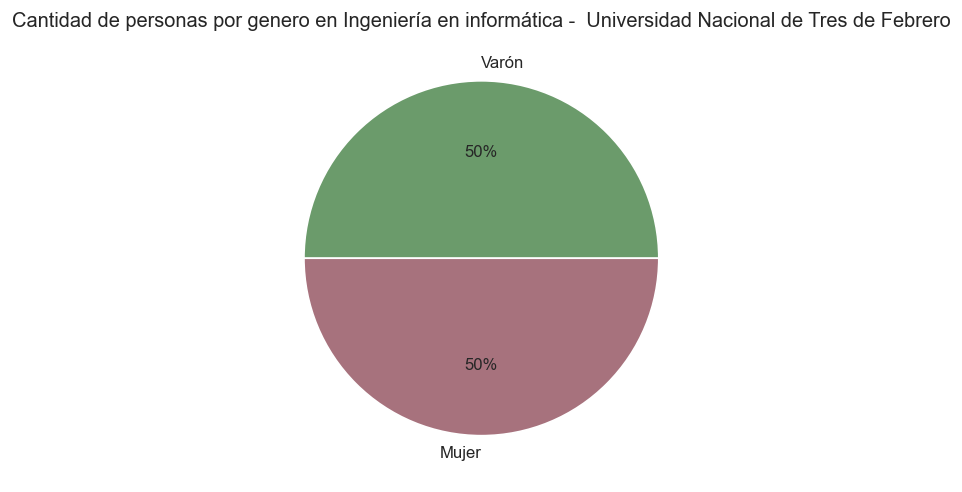

In [156]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, como vemos en este caso, aunque UTN tiene una diferencia del 2% sobre las alumnas no es significativo. Lo mismo sucede en la UNTF donde la carrera parece tener una paridad.

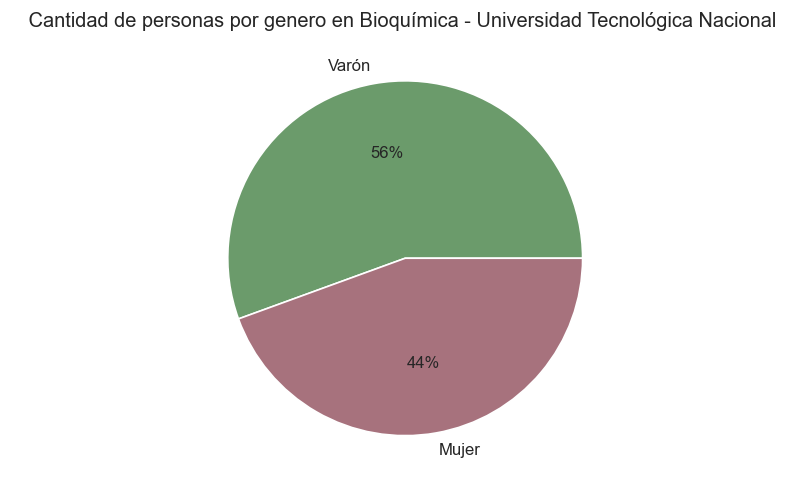

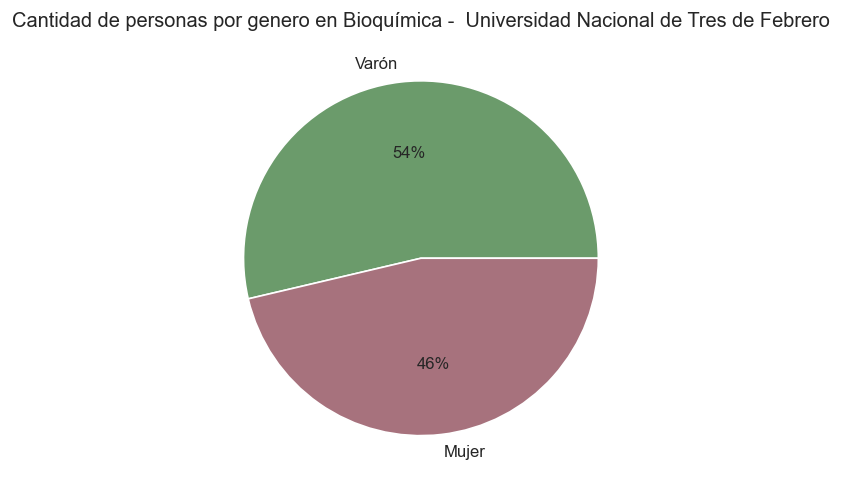

In [157]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

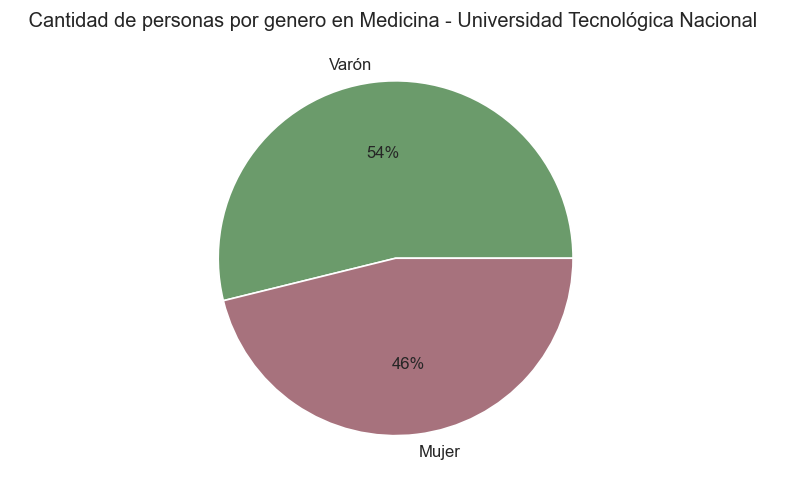

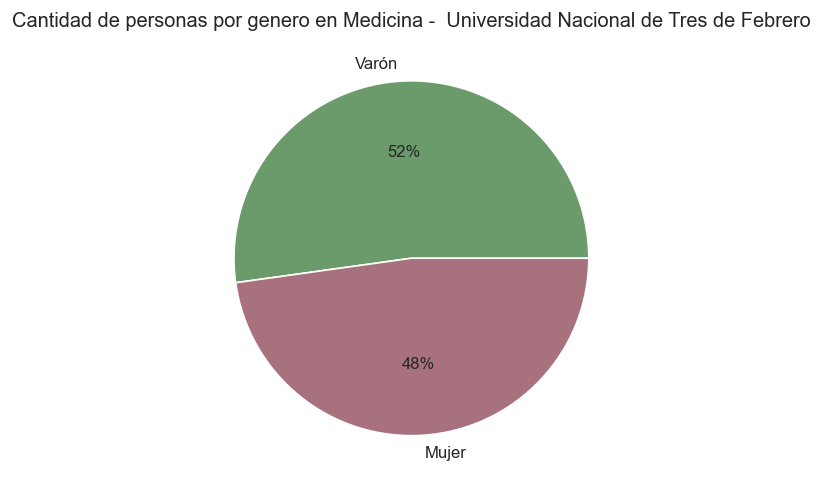

In [158]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones. En ambos casos se puede ver cierta equidad con diferencias menores al 5%, con prevalencia de varones en todos los casos.

# Conclusiones

- UTN tiene una distribución uniforme, con lo cuál es importante remarcar que la cantidad de alumnos de todas las edades en edad de trabajo es alta y podría ser interesante la estimulación de turnos y comisiones nocturnas para no interferir con sus actividades.
- UNTN Tiene una proporción de varones en todas sus carreras con algunas excepciones como Ciencias Biológicas en donde más del 65% del alumnado declara ser mujeres. Con lo cuál a lo largo de todos sus tipos de carreras deberían plantearse políticas de inclusión para mejorar ese desbalance.
- UNTF tiene una distribución similar a una distribución Poisson, con un pico en los 20 años, con lo cuál el alumnado es esencialmente joven, con lo cuál podría incentivarse un aumento de alumnado de mayor edad creando carreras cortas y otorgando becas a personas mayores de 21 años.
- UNTF tiene cierta equidad a lo largo de sus carreras, aunque podría destacarse que las carreras de Artes y Diseño y Cienccias Empresariales están más pobladas de alumnos varones, aunque no en mucha proporción, con lo cúal deberían ser un buen objetivo para estimular el ingreso de alumnas.
  